In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


In [3]:
url='https://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=2&ref_=adv_nxt'
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.content,'html.parser')

In [41]:
movie_containers = soup.findAll('div',class_='lister-item mode-advanced')

In [42]:
len(movie_containers) # number of movies 

50

# code for 1 movie

In [8]:
first_movie = soup.find('div',class_='lister-item mode-advanced')

In [10]:
# name of the movie
first_movie.h3.a.text 

'Logan'

In [11]:
#genre of the movie 
first_movie.find('span',class_="genre").text.strip()

'Action, Drama, Sci-Fi'

In [12]:
# year of the movie
first_movie.find('span', class_="lister-item-year text-muted unbold").text.strip()

'(2017)'

In [13]:
#rating
float(first_movie.strong.text)

8.1

In [14]:
#metascore
first_movie.find('span' ,class_="metascore favorable").text.strip()

'77'

In [15]:
#movie votes
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes
first_votes['data-value']

'547998'

In [16]:
int(first_votes['data-value'])

547998

In [37]:
k=movie_container[22].find('div' ,class_="inline-block ratings-metascore")

In [38]:
type(k)

NoneType

# final code for 1 page 

In [39]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

In [43]:
# Extract data from individual movie container
for container in movie_containers:
    # If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
        # The name
        name = container.h3.a.text
        names.append(name)
        # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
        # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [44]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'metascore': metascores,
                       'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
movie        45 non-null object
year         45 non-null object
imdb         45 non-null float64
metascore    45 non-null int64
votes        45 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,547998
1,Wonder Woman,(2017),7.5,76,478221
2,Guardians of the Galaxy Vol. 2,(2017),7.7,67,464225
3,Dunkirk,(2017),7.9,94,458734
4,Thor: Ragnarok,(2017),7.9,74,456163
5,Star Wars: Episode VIII - The Last Jedi,(2017),7.2,85,454936
6,Spider-Man: Homecoming,(2017),7.5,73,407879
7,Get Out,(I) (2017),7.7,84,389048
8,Blade Runner 2049,(2017),8.0,81,370519
9,Baby Driver,(2017),7.6,86,355399


# eda for 1 page

In [45]:
import matplotlib.pyplot as plt 


Text(0.5,0,'votes')

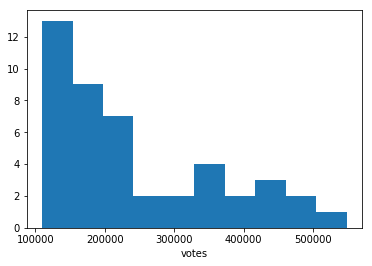

In [47]:
plt.hist(test_df.votes)
plt.xlabel('votes')

Text(0.5,0,'imdb-rating')

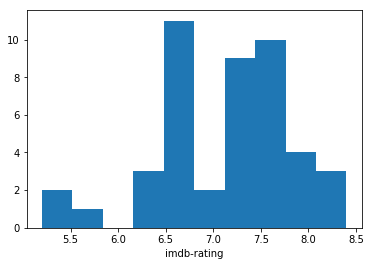

In [72]:
plt.hist(test_df.imdb)
plt.xlabel('imdb-rating')

Text(0,0.5,'votes')

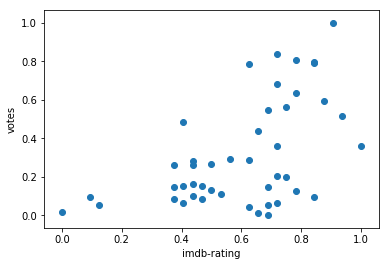

In [71]:
# looking if there is trend between rating and votes
plt.scatter(test_df.imdb.apply(lambda x:(x-min(test_df.imdb))/(max(test_df.imdb)-min(test_df.imdb))),test_df.votes.apply(lambda x:(x-min(test_df.votes))/(max(test_df.votes)-min(test_df.votes))))
plt.xlabel('imdb-rating')
plt.ylabel('votes')

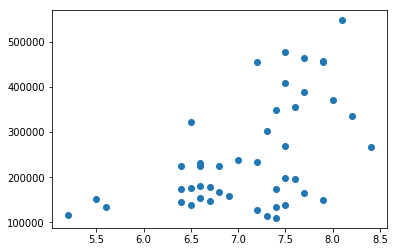

In [74]:
plt.scatter(test_df.imdb,test_df.votes)

In [76]:
test_df.imdb.describe()

count    45.000000
mean      7.117778
std       0.706878
min       5.200000
25%       6.600000
50%       7.300000
75%       7.600000
max       8.400000
Name: imdb, dtype: float64

In [78]:
test_df.imdb[test_df.imdb == 8.4]# movie with the highest imdb rating

15    8.4
Name: imdb, dtype: float64

In [81]:
test_df.iloc[15]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

movie              Coco
year         (I) (2017)
imdb                8.4
metascore            81
votes            267566
Name: 15, dtype: object

In [73]:
# (x-min(test_df.votes))/(max(test_df.votes)-min(test_df.votes))         # normalization

# The script for multiple pages

## Controlling the crawl-rate

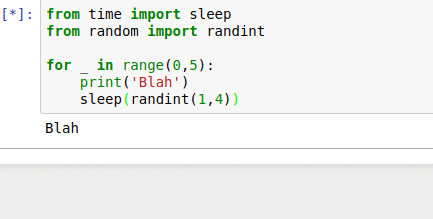

### Monitoring the loop 

In [87]:
from time import sleep
from random import randint

In [91]:
from IPython.core.display import clear_output
from time import time
start_time = time()
requests = 0
for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.6245660444271631 requests/s


# final code

In [96]:
headers = {"Accept-Language": "en-US, en;q=0.5"} # english

In [97]:
from requests import get

In [98]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.07300260420515346 requests/s


In [99]:
movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 5 columns):
movie        3296 non-null object
year         3296 non-null object
imdb         3296 non-null float64
metascore    3296 non-null int64
votes        3296 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 128.8+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1200311
1,Memento,(2000),8.5,80,1022854
2,Snatch,(2000),8.3,55,712812
3,Requiem for a Dream,(2000),8.3,68,694359
4,X-Men,(2000),7.4,64,531404
5,Cast Away,(2000),7.8,73,469582
6,American Psycho,(2000),7.6,64,427630
7,Unbreakable,(2000),7.3,62,345558
8,Meet the Parents,(2000),7.0,73,291917
9,Mission: Impossible II,(2000),6.1,59,289061


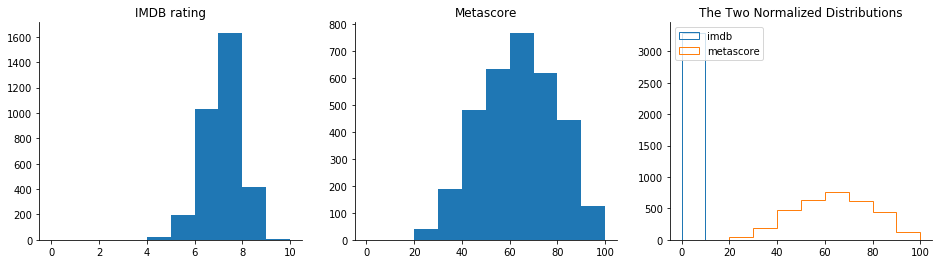

In [107]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()